In [21]:
from section3.src.inference_dcm import get_series_for_inference, load_dicom_volume_as_numpy_from_list, create_report, get_predicted_volumes
import numpy as np
from section3.src.inference.UNetInferenceAgent import UNetInferenceAgent

In [11]:
path = '../../data/TestVolumes/Study1/13_HCropVolume'
dcmlist = get_series_for_inference(path)

(35, 51, 32)

In [12]:
volume, header = load_dicom_volume_as_numpy_from_list(dcmlist)
volume.shape

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 262
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.8.498.56020628585509833724211063940588667768
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.8.498.76647264891085702040065110813461770521
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 1.4.0'
(0002, 0016) Source Application Entity Title     AE: 'DicomBrowser'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['DERIVED', 'SECONDARY', 'AXIAL']
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.826.0.1.3680043.8.498.56020628585509833724

In [4]:
header

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 262
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.8.498.84632596231518027319301280199914303229
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.8.498.54149267487955637153276375735182221723
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 1.4.0'
(0002, 0016) Source Application Entity Title     AE: 'DicomBrowser'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['DERIVED', 'SECONDARY', 'AXIAL']
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.826.0.1.3680043.8.498.84632596231518027319

In [23]:
inference_agent = UNetInferenceAgent(device="cpu",parameter_file_path=r"../../section2/out/model.pth")

In [24]:
pred_label = inference_agent.single_volume_inference_unpadded(np.array(volume))
pred_volumes = get_predicted_volumes(pred_label)

NotImplementedError: 

Creating and pushing report...


/home/nttputus/anaconda3/envs/medai/lib/python3.7/site-packages/ipykernel_launcher.py:126: RuntimeWarning: invalid value encountered in true_divide


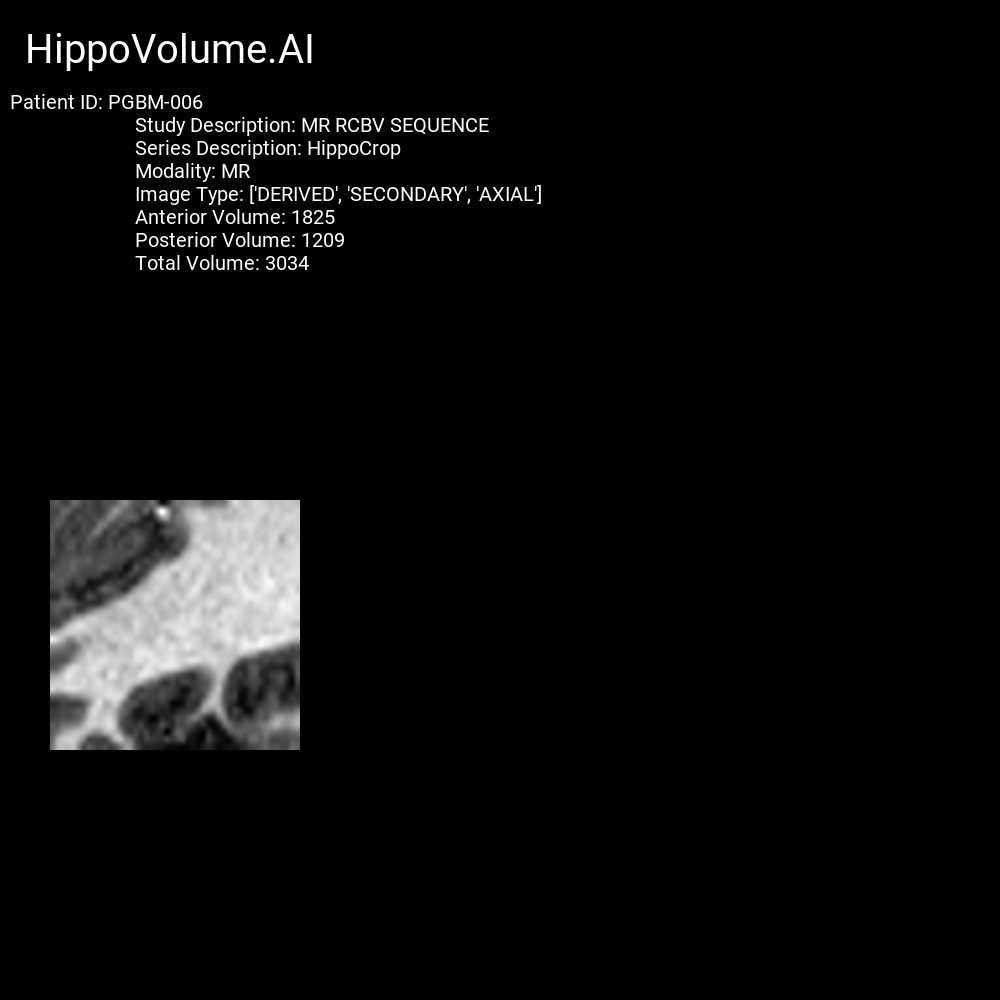

In [8]:
print("Creating and pushing report...")
report_img = create_report(pred_volumes, header, volume, pred_label)
report_img

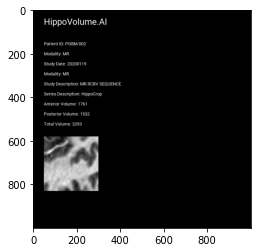

In [29]:
from matplotlib.pyplot import imshow
import pydicom
%matplotlib inline
report_save_path = r"../out/report.dcm"
imshow(np.asarray(pydicom.dcmread(report_save_path).pixel_array))